<h1>Import library</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('darkgrid')

<h1>Loading dataset</h1>

In [2]:
df = pd.read_csv("zomato.csv")

In [3]:
#display number of row and column in data
df.shape

(51717, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

<h3>Data Cleaning</h3>

In [5]:
#Dropping unnecessary columns 
df.drop(['url','address','phone','location','dish_liked','reviews_list','menu_item'],axis=1,inplace=True)

In [6]:
#Renaming the columns

df=df.rename(columns={"name":'Name','rate':'Ratings','votes':'Votes','rest_type':'Rest_Type','cuisines':'Cuisines','approx_cost(for two people)':'Cost','listed_in(type)':'Type','listed_in(city)':'City','online_order':'Takes online orders?','book_table':'Has table booking?'})

In [7]:
# count duplicate rows
sum(df.duplicated())


124

In [8]:
# drop duplicate row
df=df.drop_duplicates()

In [9]:
df

,Name,Takes online orders?,Has table booking?,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,Bar,Finger Food,"2,500",Pubs and bars,Whitefield


<h2>Cleaning individual rows</h2>

In [10]:
#First, let’s remove redundant data from the ‘Name’ column.
#This involves removing punctuation, numbers, special characters, etc., and retaining only alphabets.

def name_clean(text):
    return re.sub(r"[^a-zA-Z0-9 ]", "", text)
df['Name'] = df['Name'].apply(lambda x: name_clean(x))

In [11]:
df

,Name,Takes online orders?,Has table booking?,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews Four Points by Sheraton Bengaluru,No,No,3.6 /5,27,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,NaN,0,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3 /5,236,Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [12]:
#Let us now look at the ‘Ratings’ column

df['Ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

We can see that we have ‘nan,’ ‘NEW,’ and ‘-‘ values that do not have any ratings, and also, the values are strings containing ‘/5’.
Let us remove all insignificant data and convert the ratings into numeric values.

In [13]:
## removing 'nan', 'NEW', '-' values
df["Ratings"]=df["Ratings"].replace(["NEW",'Nan','nan','-'], np.nan)


In [14]:
## function to remove '/5'
def remove_5(value: str):
    if type(value)==str:
        value_new=value.split('/')[0]
        return value_new
    return value
df['Ratings']=df['Ratings'].apply(remove_5)

## converting to float type data

df['Ratings']=df['Ratings'].astype(float)

print(df['Ratings'].dtypes)

float64


In [15]:
#Noticing the ‘cost’ attribute, we can observe that they are string values containing commas. Below is the code to convert them into numbers.

## function to remove commas and convert the values into numbers
def cost(value):
    value = str(value)
    if "," in value:
        value = float(value.replace(",",""))
        return value
    else:
        return float(value)
df['Cost'] = df['Cost'].apply(cost)
print(df['Cost'].head())

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: Cost, dtype: float64


In [16]:
#display nan value
print(df.isnull().sum())
print([features for features in df.columns if df[features].isnull().sum()>0])

Name                        0
Takes online orders?        0
Has table booking?          0
Ratings                 10003
Votes                       0
Rest_Type                 227
Cuisines                   45
Cost                      344
Type                        0
City                        0
dtype: int64
['Ratings', 'Rest_Type', 'Cuisines', 'Cost']


<Axes: >

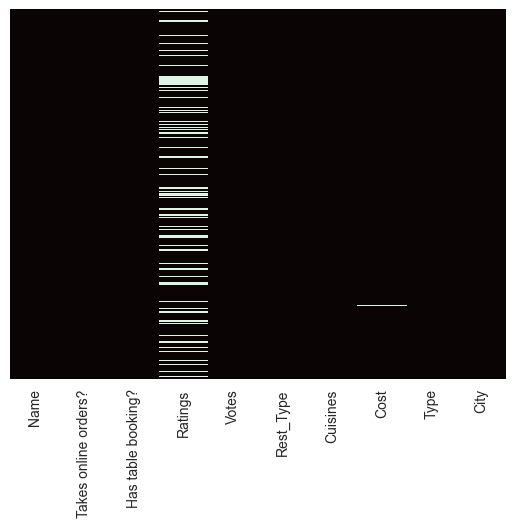

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')

<h3>Looking at the above heatmap, we can see a few missing values, particularly in the ‘Ratings’ column. Seeing that now not a good deal of facts is lacking within the other columns, we can drop the corresponding rows.<h3>

In [18]:
#drop null value
df=df.dropna()

In [19]:
df.shape

(41190, 10)

<h5>The data frame reduces to the shape – (41190,10).</h5>

<h1>Now that we have cleaned our data, it is ready for analysis.</h1>

<h4>How many restaurants in Bangalore take online orders?</h4>

Takes online orders?
Yes    27046
No     14144
Name: count, dtype: int64


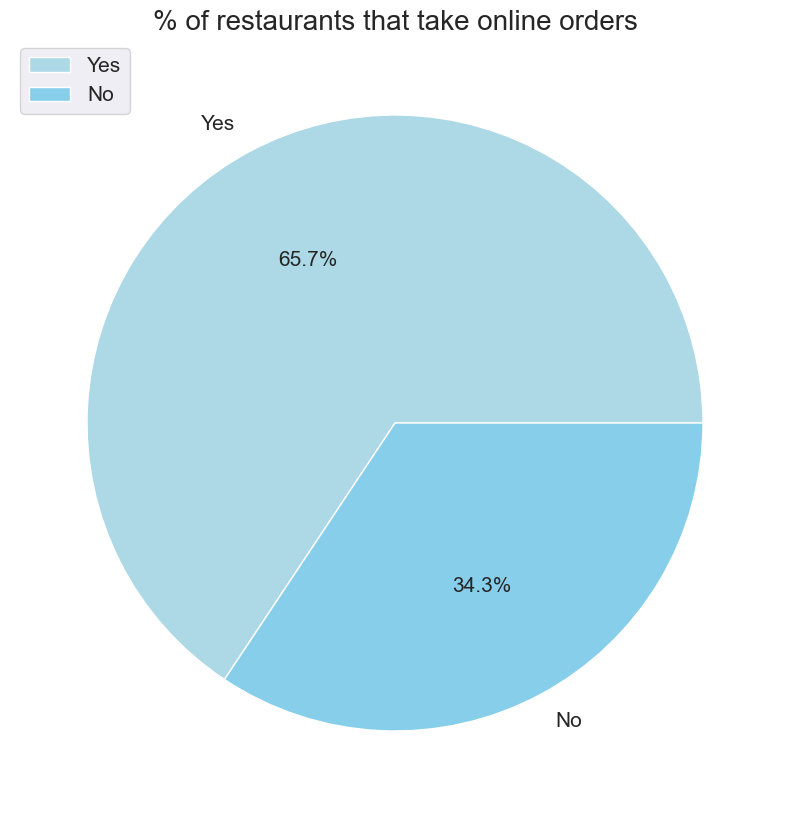

In [20]:
print(df['Takes online orders?'].value_counts())
plt.figure(figsize=(30,10))
df['Takes online orders?'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that take online orders',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 15})

<h5>It is evident from the above graph that in nearly 66% of restaurants, an online ordering facility is available.</h5>

<h4>What percentage of restaurants offer table booking facilities?</h4>

Has table booking?
No     34915
Yes     6275
Name: count, dtype: int64


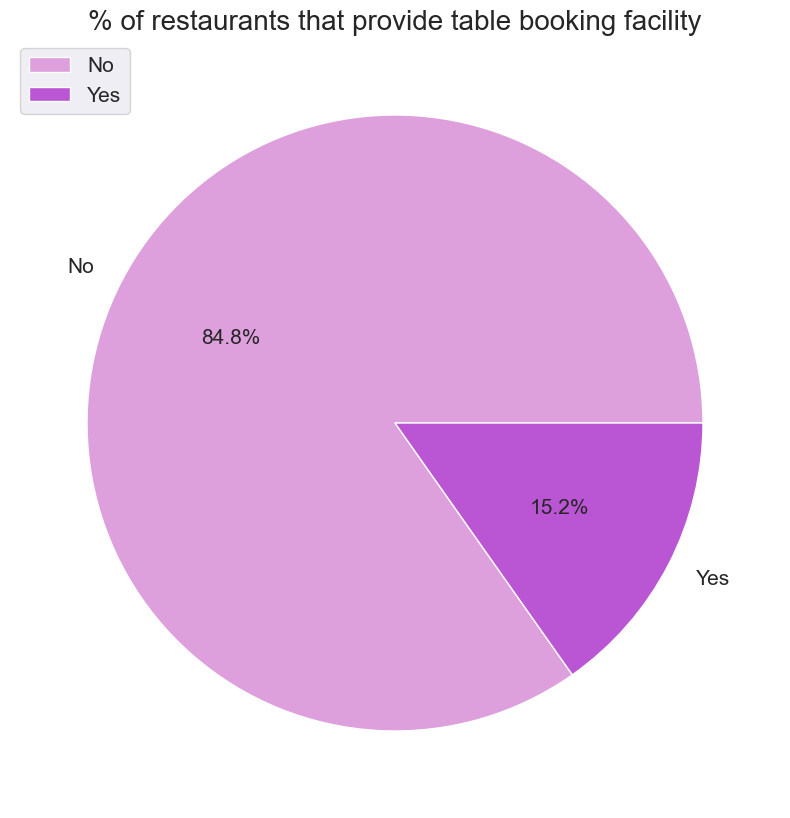

In [21]:
print(df['Has table booking?'].value_counts())
plt.figure(figsize=(30,10))
df['Has table booking?'].value_counts().plot(kind='pie',colors=['plum','mediumorchid'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that provide table booking facility',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 15})

<h5>The above pie chart shows that approximately 85% of the restaurants in Bangalore do not have a table booking facility through Zomato.</h5>

<h4>What was the most common rating?</h4>

Text(0, 0.5, 'Ratings Count')

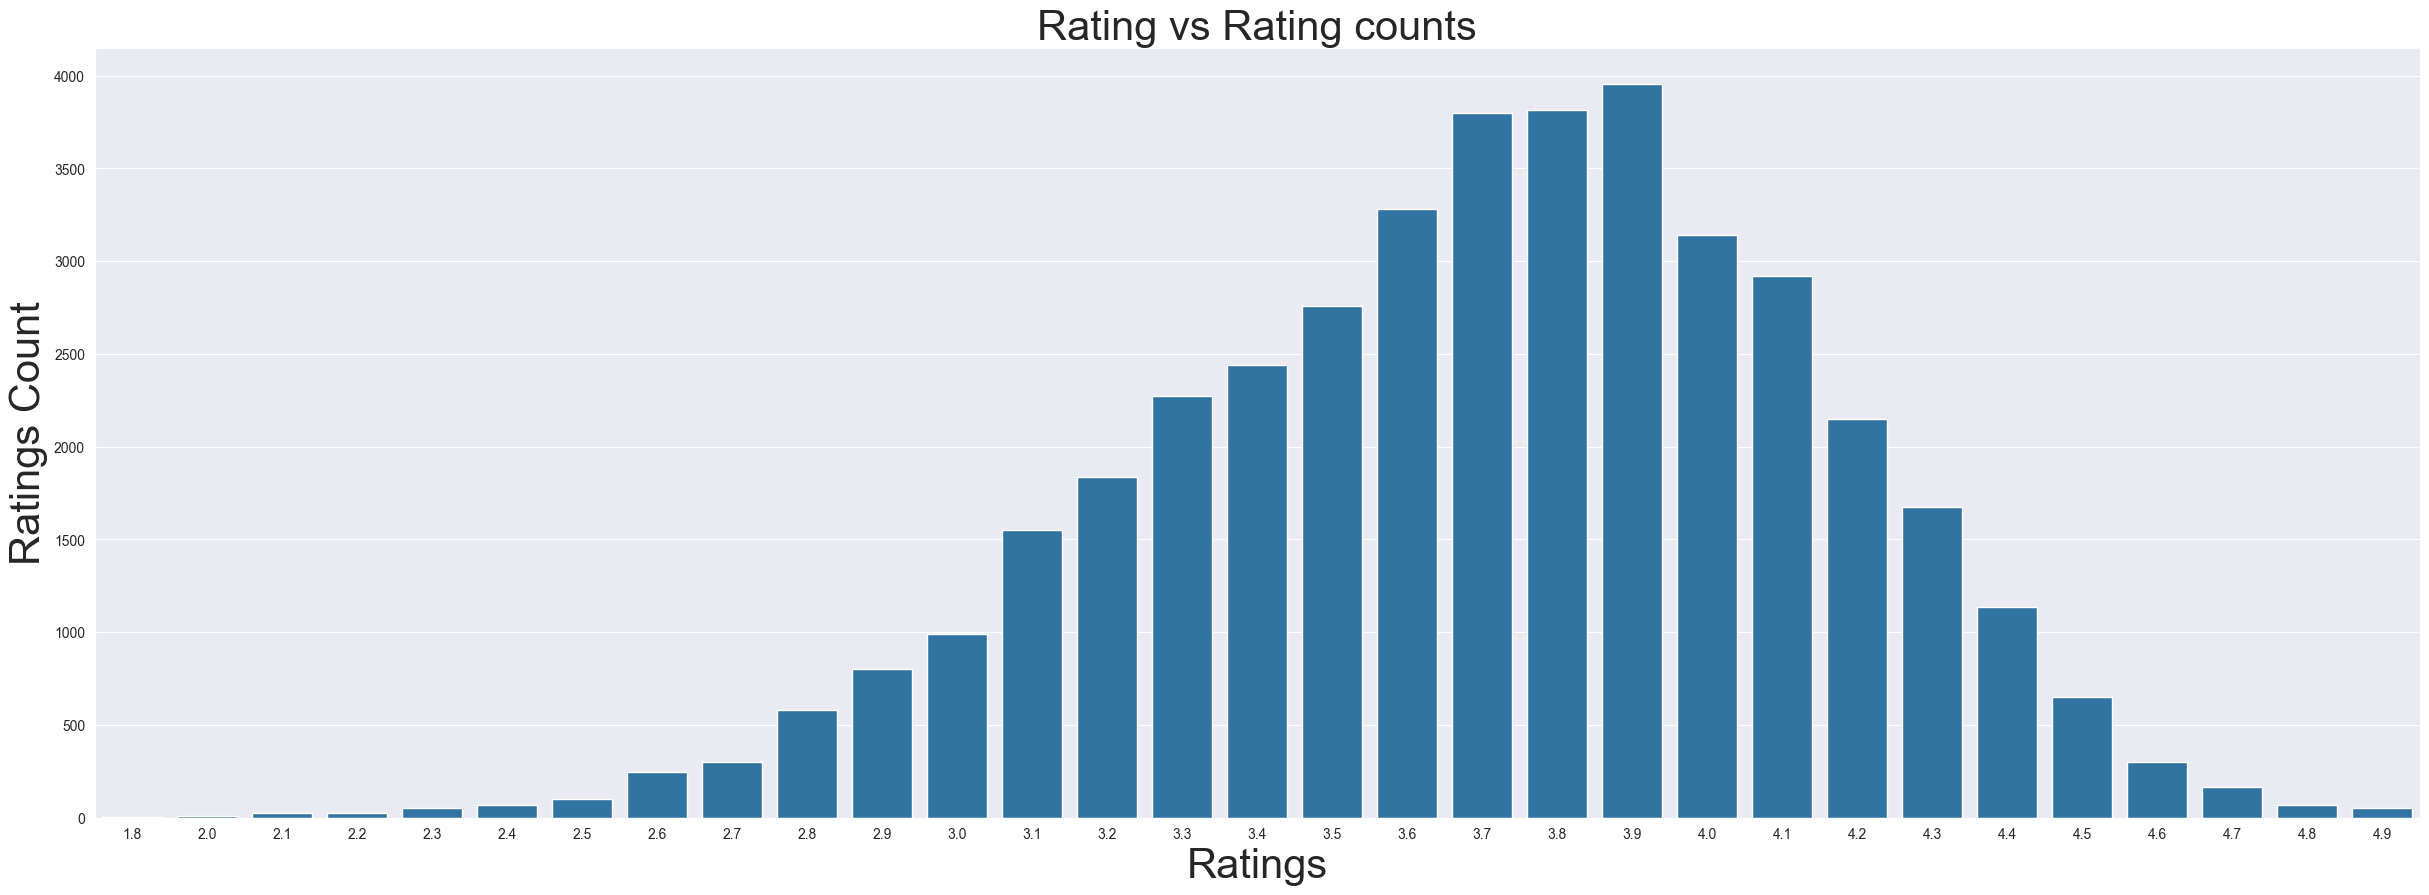

In [22]:
ratings=df.groupby(['Ratings']).size().reset_index().rename(columns={0:"Rating_Count"})
plt.figure(figsize=(30,10))
sns.barplot(x='Ratings',y='Rating_Count',data=ratings)
plt.title('Rating vs Rating counts',size=30)
plt.xlabel('Ratings',size=30)
plt.ylabel('Ratings Count',size=30)

<h5>Most of the restaurants in Bangalore received a rating of 3.6 to 4. Very few restaurants have poor ratings, and quite a group of restaurants has excellent ratings of 4.9 or 5.</h5>

<h4>Is there any correlation between the two people’s approximated cost and a restaurant’s ratings?</h4>

C:\Users\vikas pandey\AppData\Local\Temp\ipykernel_14648\2916754533.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -1000.0, '-1,000'),
 Text(0, 0.0, '0'),
 Text(0, 1000.0, '1,000'),
 Text(0, 2000.0, '2,000'),
 Text(0, 3000.0, '3,000'),
 Text(0, 4000.0, '4,000'),
 Text(0, 5000.0, '5,000'),
 Text(0, 6000.0, '6,000'),
 Text(0, 7000.0, '7,000')]

<Figure size 3000x1000 with 0 Axes>

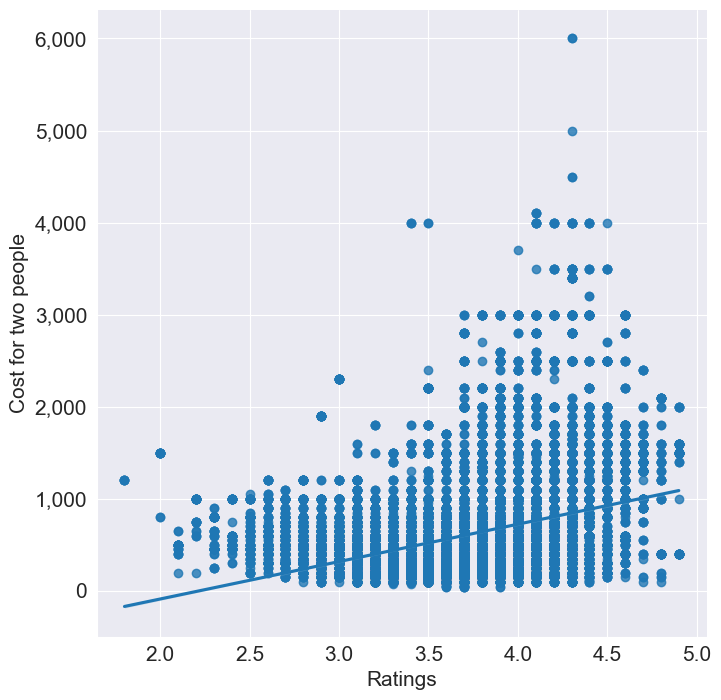

In [23]:
plt.figure(figsize=(30,10))
sns.lmplot(x='Ratings',y='Cost',data=df,height=7)
plt.xlabel('Ratings',size=15)
plt.ylabel('Cost for two people',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

<h5>As we can see, restaurants that cost less have better reviews than restaurants that are expensive.</h5>

<h4>Top 5 cities in Bangalore that have a maximum number of high and low-rated restaurants.</h4>

In [24]:
a=df.groupby('City')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)
print(a.head())

              City   Ratings
7    Church Street  3.801338
5     Brigade Road  3.800742
21         MG Road  3.799536
27  Residency Road  3.778720
20    Lavelle Road  3.774948


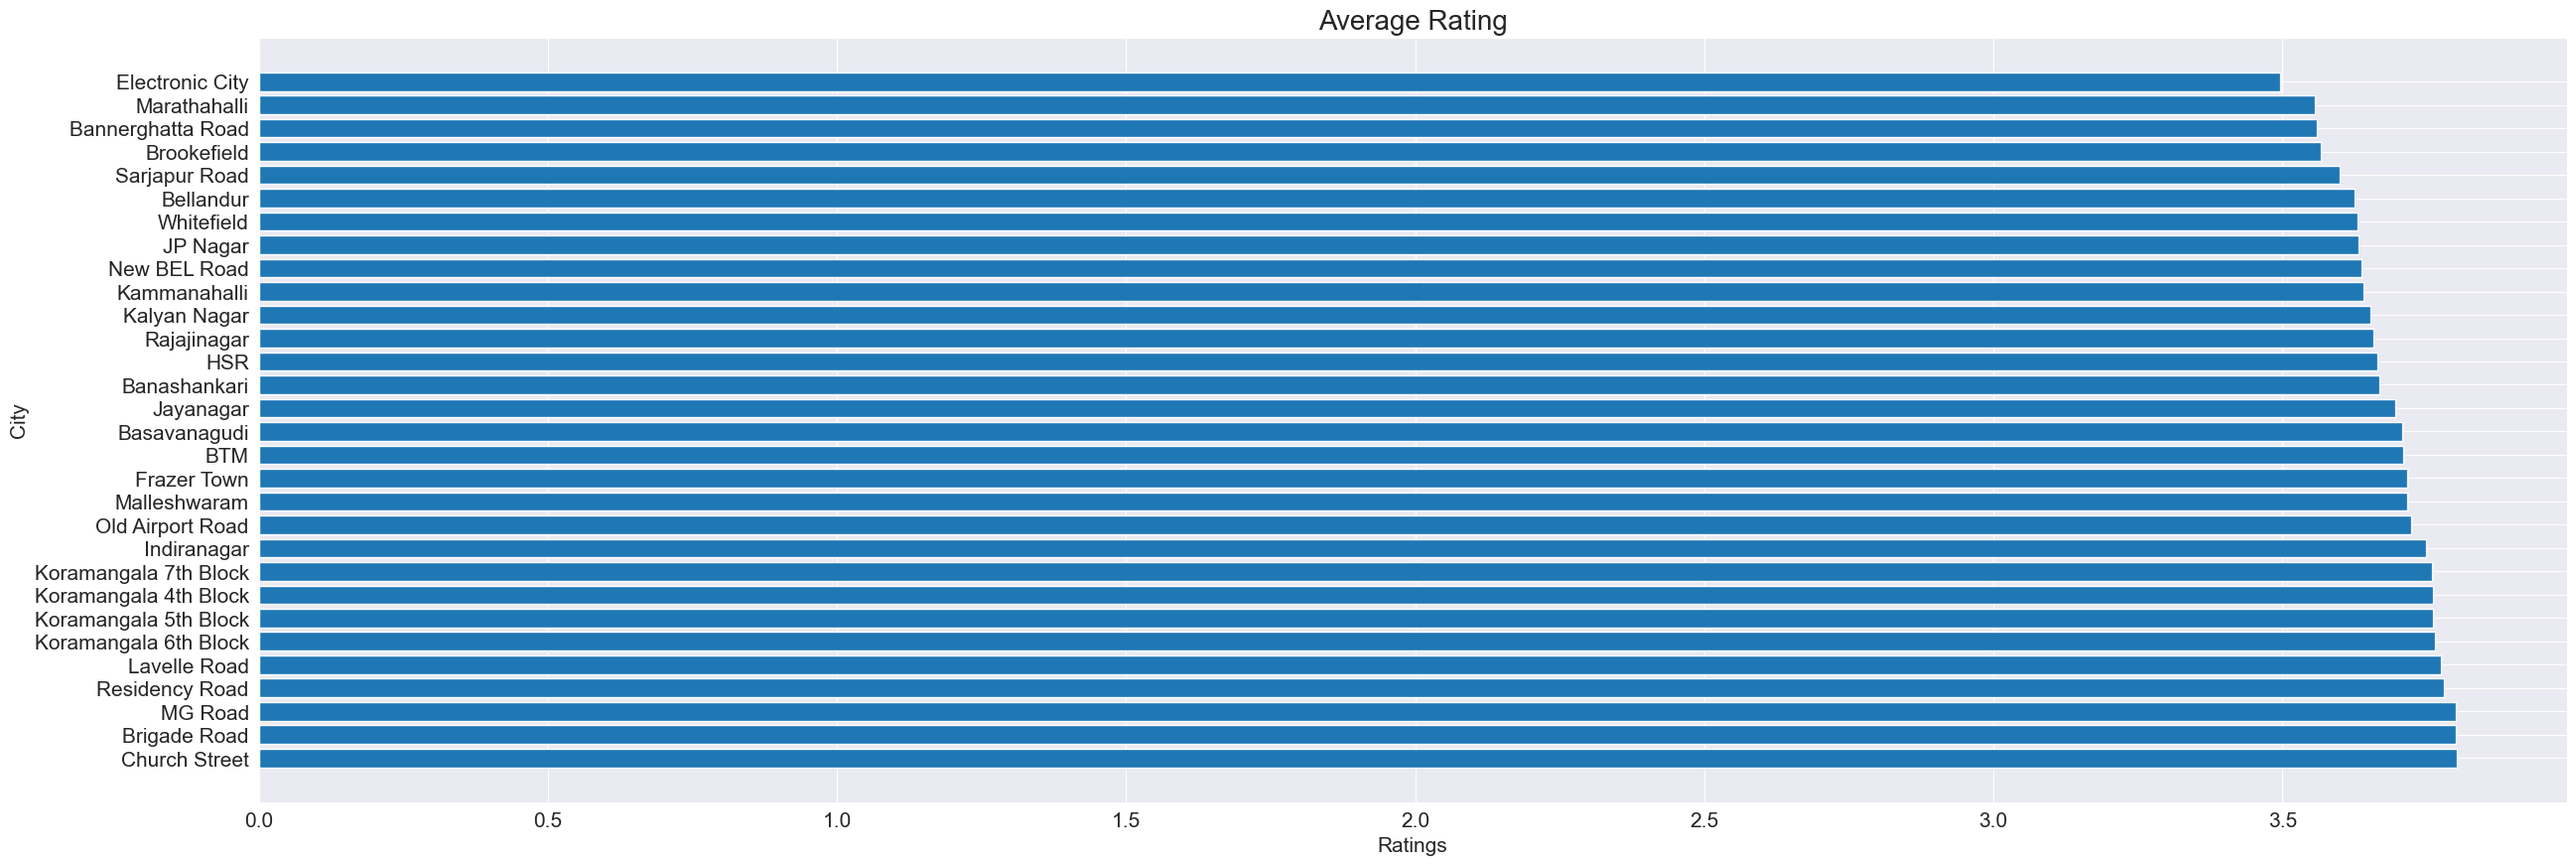

In [25]:
plt.figure(figsize=(30,10))
plt.barh(a.City,a.Ratings)
plt.xlabel('Ratings',size=15)
plt.ylabel('City',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Average Rating',size=20)
plt.show()

<h5>High-rated restaurants are most commonly found in Church Street, Brigade Road, and MG Road, while Electronic City has the lowest number of high-rated restaurants.</h5>

<h4>Does the restaurant’s rating depend on whether it accepts online orders or not?</h4>

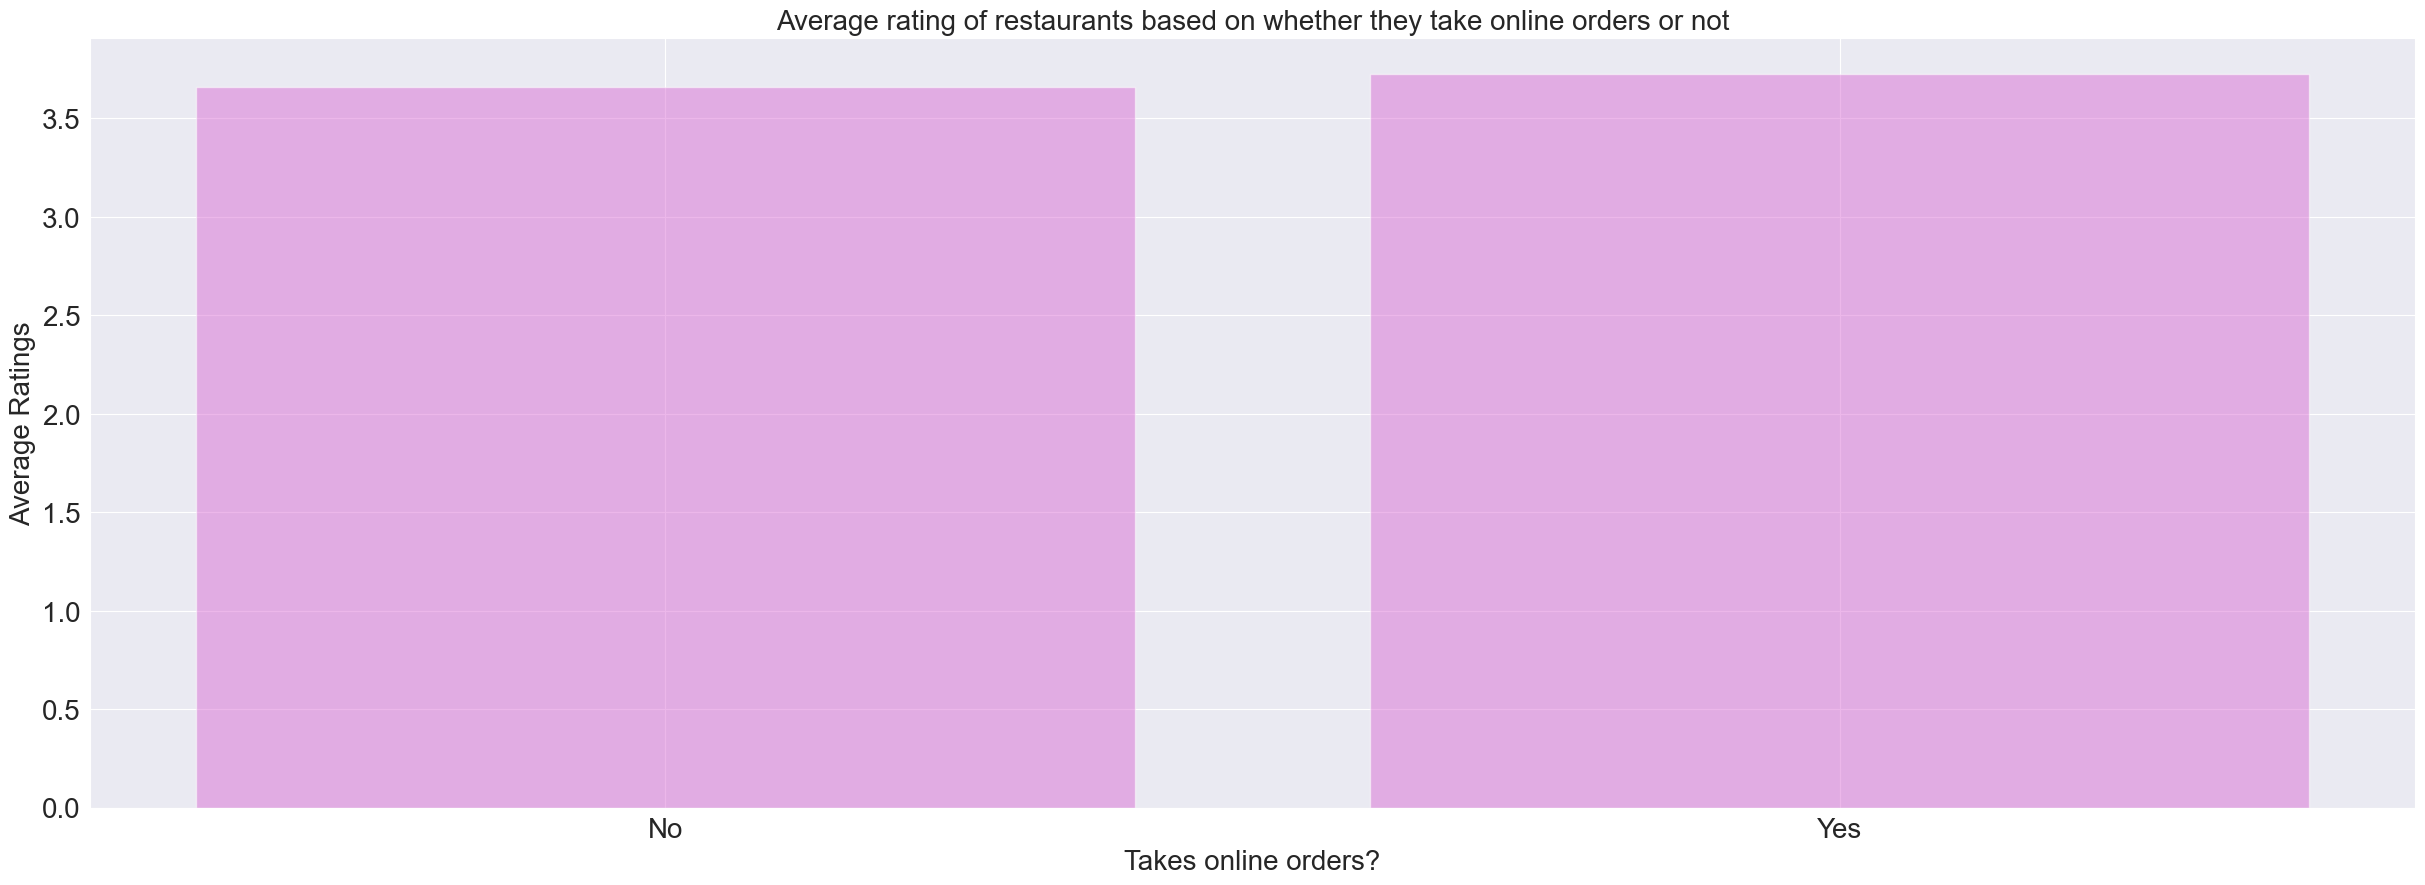

In [26]:
grp1=df.groupby('Takes online orders?')['Ratings'].mean().reset_index()
plt.figure(figsize=(30,10))
plt.bar(grp1['Takes online orders?'],grp1['Ratings'],alpha=0.5,color='orchid')
plt.xlabel('Takes online orders?',size=20)
plt.ylabel('Average Ratings',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average rating of restaurants based on whether they take online orders or not',size=20)
plt.show()

<h5>Restaurants receive almost the same average ratings from customers irrespective of whether they take online orders or not. It can be concluded that a restaurant’s success does not largely depend on the facility of taking online orders.</h5>